In [1]:
import os
import numpy as np
import pandas as pd
from joblib import load

In [2]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

/Users/panyue/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
from utils.data_tool import prepare_data
from utils.output_tool import output
from train_model import evaluate_model

In [4]:
train_data_path = "./data/train_data/train_topics.csv"
test_data_path = "./data/test_data/test_topics.csv"
save_model_path = "./checkpoints"

In [5]:
def show_roc(y_test, y_scores):
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    # Show plot
    plt.figure()
    plt.plot(fpr, tpr, lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
    plt.plot([0, 1], [0, 1], lw=2, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.show()
    # Calculate best threshold
    best_threshold = thresholds[np.argmax(tpr - fpr)]
    output("Best Threshold:", best_threshold)
    return best_threshold

In [6]:
X_train, y_train = prepare_data(train_data_path, classifier=True)
X_test, y_test = prepare_data(test_data_path, classifier=True)

In [7]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

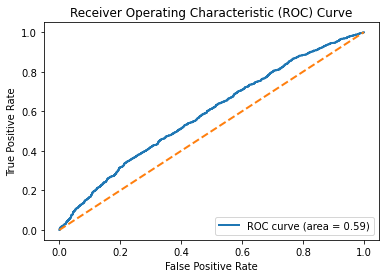

Best Threshold: 0.6159208664672764
Confusion Matrix:
 [[1041  522]
 [1216 1027]]
Accuracy: 0.5433526011560693
Precision: 0.6630083925112976
Recall: 0.45786892554614356
F1 Score: 0.5416666666666666


In [8]:
lr = load(f"{save_model_path}/LogisticRegression.joblib")
y_scores = lr.predict_proba(X_test)[:, 1]
best_threshold = show_roc(y_test, y_scores)
y_pred = (y_scores > best_threshold).astype(int)
evaluate_model(y_pred, y_test)

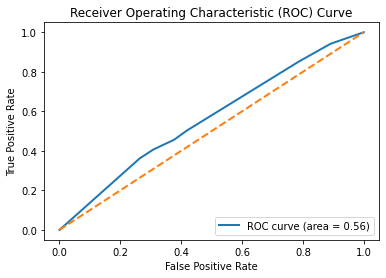

Best Threshold: 0.6884859901106664
Confusion Matrix:
 [[1528   35]
 [2175   68]]
Accuracy: 0.41933788754598006
Precision: 0.6601941747572816
Recall: 0.03031654034774855
F1 Score: 0.05797101449275363


In [9]:
dt = load(f"{save_model_path}/DecisionTreeClassifier.joblib")
y_scores = dt.predict_proba(X_test)[:, 1]
best_threshold = show_roc(y_test, y_scores)
y_pred = (y_scores > best_threshold).astype(int)
evaluate_model(y_pred, y_test)

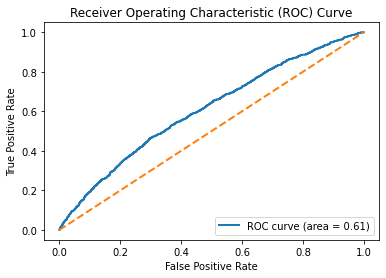

Best Threshold: 0.6029323257581768
Confusion Matrix:
 [[1099  464]
 [1205 1038]]
Accuracy: 0.5614818707304257
Precision: 0.6910785619174434
Recall: 0.46277307177886756
F1 Score: 0.5543391188251002


In [10]:
rf = load(f"{save_model_path}/RandomForestClassifier.joblib")
y_scores = rf.predict_proba(X_test)[:, 1]
best_threshold = show_roc(y_test, y_scores)
y_pred = (y_scores > best_threshold).astype(int)
evaluate_model(y_pred, y_test)

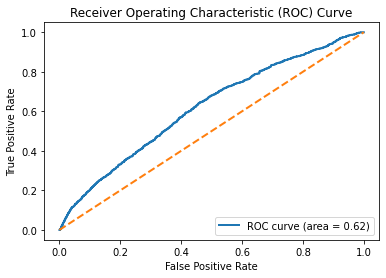

Best Threshold: 0.58351101328259
Confusion Matrix:
 [[ 842  721]
 [ 796 1447]]
Accuracy: 0.6014188124014713
Precision: 0.6674354243542435
Recall: 0.645118145341061
F1 Score: 0.6560870550895488


In [11]:
nn = load(f"{save_model_path}/NeuralNetworks.joblib")
y_scores = nn.predict_proba(X_test)[:, 1]
best_threshold = show_roc(y_test, y_scores)
y_pred = (y_scores > best_threshold).astype(int)
evaluate_model(y_pred, y_test)